# Data Analysis I

Let's check whats in our data. Before heading to data analysis, we are going to take the meta data along with us and analyze different kinds of data in a different way. So we have 3 kinds of data
1. Numeric
2. Categorical (ordinal/nominal)
3. Temporal<br><br>
We have to check different kinds of data in a differnt manner. So the data analysis phase consists up of the following steps, these are
- Descriptive analysis
- Null Value handling
- Outlier
- Inferential analysis
- EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/raw/train.csv')
meta = pd.read_csv('../data/meta_data.csv', index_col= 'Unnamed: 0')
meta.index.name=None

In [3]:
data.shape, meta.shape

((1460, 81), (81, 7))

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
# first column is id - it's only useful to check the uniqueness, if sum of duplicates is more than 0, then there is duplicates

dup = data.duplicated('Id')
dup.sum()

0

In [7]:
# dropping the id column now as it has no use

data.drop('Id', axis=1, inplace=True)

In [8]:
# grouping the data in terms of numeric, categorical, and temporal
meta.head(2)

,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
Id,0,0.0,int64,Id,non,none,none
MSSubClass,0,0.0,int64,MSSubClass,int,house,strong


In [9]:
cat_cols = meta[(meta['expect_datatype']=='ord')|(meta['expect_datatype']=='nom')].index.tolist()
temporal_cols = meta[meta['expect_datatype']=='tem'].index.tolist()
num_cols = meta[meta['expect_datatype']=='int'].index.tolist()

In [10]:
# value counts in categorical columns
c=0
for i in cat_cols:
    print(i)
    print("---------------")
    print(data[i].value_counts(dropna=False))
    print('\n\n')
    c+=1

MSZoning
---------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64



Street
---------------
Pave    1454
Grvl       6
Name: Street, dtype: int64



Alley
---------------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64



LotShape
---------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64



LandContour
---------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64



Utilities
---------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64



LotConfig
---------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64



LandSlope
---------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64



Neighborhood
---------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes    

In [11]:
meta

,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
Id,0,0.000000,int64,Id,non,none,none
MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong
MSZoning,0,0.000000,object,MSZoning,nom,location,medium
LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium
LotArea,0,0.000000,int64,LotArea,int,peripheral,medium
...,...,...,...,...,...,...,...
MoSold,0,0.000000,int64,MoSold,tem,house,medium
YrSold,0,0.000000,int64,YrSold,tem,house,strong
SaleType,0,0.000000,object,SaleType,nom,house,weak
SaleCondition,0,0.000000,object,SaleCondition,nom,house,weak


In [12]:
null_cols = meta.loc[meta['pct_null']!=0, ['expect_datatype', 'pct_null']].sort_values('pct_null',ascending=False)
null_cols

,expect_datatype,pct_null
PoolQC,ord,99.520548
MiscFeature,nom,96.301370
Alley,nom,93.767123
Fence,ord,80.753425
FireplaceQu,ord,47.260274
LotFrontage,int,17.739726
GarageType,nom,5.547945
GarageYrBlt,tem,5.547945
GarageFinish,ord,5.547945
GarageQual,ord,5.547945


From the above data frame we can assume that there are 3 categories of missing values
1. Missing values are higher than 80% of the data
2. Missing value groups which have same number of missing values
3. Missing values cols with unique missing values, which are less than 80%.

Lets check our assumption using missingno

In [13]:
# grouping missing values 
ls = []
for i in null_cols.index.tolist():
    pct = null_cols.loc[i, 'pct_null']
    ls.append(null_cols[null_cols['pct_null']==pct].index.tolist())

In [14]:
uniq = []
for i in ls:
    if i not in uniq:
        uniq.append(i)

In [15]:
uniq

[['PoolQC'],
 ['MiscFeature'],
 ['Alley'],
 ['Fence'],
 ['FireplaceQu'],
 ['LotFrontage'],
 ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
 ['BsmtExposure', 'BsmtFinType2'],
 ['BsmtFinType1', 'BsmtCond', 'BsmtQual'],
 ['MasVnrArea', 'MasVnrType'],
 ['Electrical']]

In [16]:
# nullity correlation values
null_df = data[null_cols.index].isna().astype(int)
null_df.corr()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
PoolQC,1.000000,0.038936,-0.017895,0.117023,0.065705,0.006276,0.016822,0.016822,0.016822,0.016822,0.016822,0.011346,0.011346,0.011192,0.011192,0.011192,0.005152,0.005152,0.001817
MiscFeature,0.038936,1.000000,0.009521,0.125260,-0.025293,-0.051497,-0.000065,-0.000065,-0.000065,-0.000065,-0.000065,-0.036346,-0.036346,-0.037675,-0.037675,-0.037675,0.014547,0.014547,0.005131
Alley,-0.017895,0.009521,1.000000,0.003490,-0.119135,0.082645,-0.048905,-0.048905,-0.048905,-0.048905,-0.048905,0.024352,0.024352,0.023546,0.023546,0.023546,-0.019242,-0.019242,0.006750
Fence,0.117023,0.125260,0.003490,1.000000,-0.063330,-0.014332,-0.003114,-0.003114,-0.003114,-0.003114,-0.003114,0.036159,0.036159,0.034504,0.034504,0.034504,0.036237,0.036237,0.012781
FireplaceQu,0.065705,-0.025293,-0.119135,-0.063330,1.000000,-0.116376,0.202086,0.202086,0.202086,0.202086,0.202086,0.086521,0.086521,0.091777,0.091777,0.091777,0.004073,0.004073,0.027656
LotFrontage,0.006276,-0.051497,0.082645,-0.014332,-0.116376,1.000000,-0.057720,-0.057720,-0.057720,-0.057720,-0.057720,-0.008346,-0.008346,-0.006431,-0.006431,-0.006431,0.014107,0.014107,-0.012158
GarageType,0.016822,-0.000065,-0.048905,-0.003114,0.202086,-0.057720,1.000000,1.000000,1.000000,1.000000,1.000000,0.091929,0.091929,0.094187,0.094187,0.094187,-0.017990,-0.017990,-0.006345
GarageYrBlt,0.016822,-0.000065,-0.048905,-0.003114,0.202086,-0.057720,1.000000,1.000000,1.000000,1.000000,1.000000,0.091929,0.091929,0.094187,0.094187,0.094187,-0.017990,-0.017990,-0.006345
GarageFinish,0.016822,-0.000065,-0.048905,-0.003114,0.202086,-0.057720,1.000000,1.000000,1.000000,1.000000,1.000000,0.091929,0.091929,0.094187,0.094187,0.094187,-0.017990,-0.017990,-0.006345
GarageQual,0.016822,-0.000065,-0.048905,-0.003114,0.202086,-0.057720,1.000000,1.000000,1.000000,1.000000,1.000000,0.091929,0.091929,0.094187,0.094187,0.094187,-0.017990,-0.017990,-0.006345


### Types and handling of missing values
1. MCAR: means missing completely at random. The missing data has nothing to do with observed or other missing values. You can opt for complete case analysis (means dropping all the missing values)
2. MAR: Missing values are related to some of the observed data points. They are related to the observed data. Can be predicted using the observed and realted data points.
3. MNAR: Missing not at random. These are the most complicated one. And also hard to impute. Missing values are related with each other.

In [17]:
# the list of MNAR is the above list with correlated features. 
mnar_list = [i for i in uniq if len(i)>1]
mnar_list

[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
 ['BsmtExposure', 'BsmtFinType2'],
 ['BsmtFinType1', 'BsmtCond', 'BsmtQual'],
 ['MasVnrArea', 'MasVnrType']]

### Garage related MNAR Values
According to the data description, the nan values in garage is for absent of garage. So the garage type will be set as NA. Garage year built will be equals to house built year. Garage quality will be set to NA and condtion, garagefinish will also be the same.

In [18]:
# checking value counts for GarageType
data['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [19]:
data[data['GarageType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN

In [20]:
# setting values in MNAR list of garage:
data.loc[data['GarageType'].isna(), 'GarageType'] = 'no_garage'
data.loc[data['GarageYrBlt'].isna(), 'GarageYrBlt'] = data.loc[data['GarageYrBlt'].isna(), 'YearBuilt']
data.loc[data['GarageQual'].isna(), 'GarageQual'] = 'no_garage'
data.loc[data['GarageCond'].isna(), 'GarageCond'] = 'no_garage'
data.loc[data['GarageFinish'].isna(), 'GarageFinish'] = 'no_garage'

### Basement related MNAR values
According to the given data description, related to basement columns, if no basements are present those columns filled with nan values. So check the unique values of those columns which are related to the basement.

In [21]:
# checking value counts of BsmtExposure
data[data['BsmtExposure'].isna()].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,no_garage,1955.0,no_garage,0,0,no_garage,no_garage,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


In [22]:
basement_cols = [i for i in data.columns if 'Bsmt' in i and 'Bath' not in i]
print(basement_cols)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']


In [23]:
# checking null values against the basement columns
basement_df = meta.loc[basement_cols, ['nullity','pct_null', 'dtype']]
basement_df

,nullity,pct_null,dtype
BsmtQual,37,2.534247,object
BsmtCond,37,2.534247,object
BsmtExposure,38,2.602740,object
BsmtFinType1,37,2.534247,object
BsmtFinSF1,0,0.000000,int64
BsmtFinType2,38,2.602740,object
BsmtFinSF2,0,0.000000,int64
BsmtUnfSF,0,0.000000,int64
TotalBsmtSF,0,0.000000,int64


As per our observation the data type of objects have null values and the numeric columns are filled with 0. Lets check whether size of both data frame is same or not.

In [24]:
basement_dict = {}
basement_dict['num'] = basement_df[basement_df['pct_null']==0].index.tolist()
basement_dict['cat'] = basement_df[basement_df['pct_null']!=0].index.tolist()
basement_dict

{'num': ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
 'cat': ['BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2']}

In [25]:
for i in basement_dict['cat']:
    data.loc[data[i].isna(), i] = 'no_basement'

In [26]:
# checking the value counts
for i in basement_dict['cat']:
    print(i)
    print("-----------")
    print(data[i].value_counts(dropna=False))
    print('\n\n')

BsmtQual
-----------
TA             649
Gd             618
Ex             121
no_basement     37
Fa              35
Name: BsmtQual, dtype: int64



BsmtCond
-----------
TA             1311
Gd               65
Fa               45
no_basement      37
Po                2
Name: BsmtCond, dtype: int64



BsmtExposure
-----------
No             953
Av             221
Gd             134
Mn             114
no_basement     38
Name: BsmtExposure, dtype: int64



BsmtFinType1
-----------
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
no_basement     37
Name: BsmtFinType1, dtype: int64



BsmtFinType2
-----------
Unf            1256
Rec              54
LwQ              46
no_basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64





In [27]:
# now checking the number of columns, where basement is present but other numeric values are 0.
for i in basement_dict['num']:
    print(i)
    print("--------")
    print(data.loc[(data['BsmtFinType2']!='no_basement')&data[i]==0, basement_dict['num']+basement_dict['cat']])
    print("\n\n")

BsmtFinSF1
--------
      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF BsmtQual BsmtCond  \
0            706           0        150          856       Gd       TA   
1            978           0        284         1262       Gd       TA   
2            486           0        434          920       Gd       TA   
3            216           0        540          756       TA       Gd   
5            732           0         64          796       Gd       TA   
...          ...         ...        ...          ...      ...      ...   
1453           0           0       1140         1140       Gd       TA   
1454         410           0        811         1221       Gd       TA   
1455           0           0        953          953       Gd       TA   
1456         790         163        589         1542       Gd       TA   
1459         830         290        136         1256       TA       TA   

     BsmtExposure BsmtFinType1 BsmtFinType2  
0              No          GLQ          Unf  

In [28]:
from pprint import PrettyPrinter as pp
pp = pp()
pp.pprint(basement_dict)

{'cat': ['BsmtQual',
         'BsmtCond',
         'BsmtExposure',
         'BsmtFinType1',
         'BsmtFinType2'],
 'num': ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']}


In [29]:
#### Description of basement related columns:

desc_bsmt = {}

desc_bsmt['BsmtQual'] = "Evaluates the height of the basement"
desc_bsmt['BsmtCond'] = "Evaluates the general condition of the basement"
desc_bsmt['BsmtExposure'] = "Refers to walkout or garden level walls"
desc_bsmt['BsmtFinType1'] = "Rating of basement finished area"
desc_bsmt['BsmtFinSF1'] = "Type 1 finished square feet"
desc_bsmt['BsmtFinType2'] = "Rating of basement finished area (if multiple types)"
desc_bsmt['BsmtFinSF2'] = "Type 2 finished square feet"
desc_bsmt['BsmtUnfSF'] = "Unfinished square feet of basement area"
desc_bsmt['TotalBsmtSF'] = "Total square feet of basement area"
pp.pprint(desc_bsmt)

{'BsmtCond': 'Evaluates the general condition of the basement',
 'BsmtExposure': 'Refers to walkout or garden level walls',
 'BsmtFinSF1': 'Type 1 finished square feet',
 'BsmtFinSF2': 'Type 2 finished square feet',
 'BsmtFinType1': 'Rating of basement finished area',
 'BsmtFinType2': 'Rating of basement finished area (if multiple types)',
 'BsmtQual': 'Evaluates the height of the basement',
 'BsmtUnfSF': 'Unfinished square feet of basement area',
 'TotalBsmtSF': 'Total square feet of basement area'}


In [30]:
basement_dict['num'] = [i for i in basement_dict['num'] if i in desc_bsmt.keys()]
basement_dict

{'num': ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
 'cat': ['BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2']}

In [31]:
data[(data['BsmtExposure']=='no_basement')&(data['BsmtQual']!='no_basement')]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,no_basement,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [32]:
# Let's check why the numeric values are 0, where basement is present

for i in basement_dict['num']:
    print(i, data[(data[i]==0)&(data['BsmtQual']!='no_basement')].shape[0])
    print("--------")

BsmtFinSF1 430
--------
BsmtFinSF2 1256
--------
BsmtUnfSF 81
--------
TotalBsmtSF 0
--------


So except 'TotalBsmtSF' all other values have 0 where basement is present. So let's check the value_counts of each categorical column, in the above scenario.

In [33]:
for num in basement_dict['num']:
    print(f"{num} ==> {desc_bsmt[num]} --- 0 vals -- {data[(data[num]==0)&(data['BsmtQual']!='no_basement')].shape[0]}")
    print("=============")
    print()
    for cat in basement_dict['cat']:
        print(cat)
        print("--------")
        print(data.loc[data[num]==0,cat].value_counts())
        print()
    print()

BsmtFinSF1 ==> Type 1 finished square feet --- 0 vals -- 430

BsmtQual
--------
Gd             188
TA             182
no_basement     37
Ex              34
Fa              26
Name: BsmtQual, dtype: int64

BsmtCond
--------
TA             388
no_basement     37
Fa              25
Gd              16
Po               1
Name: BsmtCond, dtype: int64

BsmtExposure
--------
No             345
Av              46
no_basement     38
Mn              27
Gd              11
Name: BsmtExposure, dtype: int64

BsmtFinType1
--------
Unf            430
no_basement     37
Name: BsmtFinType1, dtype: int64

BsmtFinType2
--------
Unf            430
no_basement     37
Name: BsmtFinType2, dtype: int64


BsmtFinSF2 ==> Type 2 finished square feet --- 0 vals -- 1256

BsmtQual
--------
Gd             567
TA             538
Ex             117
no_basement     37
Fa              34
Name: BsmtQual, dtype: int64

BsmtCond
--------
TA             1161
Gd               50
Fa               43
no_basement      37
Po      

In [34]:
# in numeric columns while 1 is zero how many are zero also
for i in basement_dict['num']:
    print(i)
#     print(f"{i} -- 0 vals -- {data[data[i]==0].shape[0]} ==> {desc_bsmt[i]}")

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF


In [35]:
# in numeric columns while 1 is zero how many are zero also
for i in basement_dict['num']:
    print(f"{i} -- 0 vals -- {data[data[i]==0].shape[0]}")
    print("--------")
    for j in basement_dict['num']:
        if j==i:
            continue
        else:
            if data[((data[i]==0)&(data[j]==0))&(data['BsmtQual']!='no_basement')].shape[0] == 0:
                continue
            else:
                print(f"{j} -- 0 vals -- {data[((data[i]==0)&(data[j]==0))&(data['BsmtQual']!='no_basement')].shape[0]}")
    print("\n\n")

BsmtFinSF1 -- 0 vals -- 467
--------
BsmtFinSF2 -- 0 vals -- 430



BsmtFinSF2 -- 0 vals -- 1293
--------
BsmtFinSF1 -- 0 vals -- 430
BsmtUnfSF -- 0 vals -- 43



BsmtUnfSF -- 0 vals -- 118
--------
BsmtFinSF2 -- 0 vals -- 43



TotalBsmtSF -- 0 vals -- 37
--------





In [36]:
# Lets find where basement is present means value!=no_basement and basement related numeric columns equals to 0.
data[(((data['BsmtFinSF2']==0)&(data['BsmtQual']!='no_basement'))&((data['BsmtFinSF1']==0)&(data['BsmtUnfSF']==0)))].shape

(0, 80)

### Conclusion for basement related columns having 0 values:
1. BsmtFinSF1 is null at 467 columns, at those rows BsmtFinSf2 is also null. Both the columns stand for Type I and Type 2 finished square fit. But when type 1 basement finished square foot is 0, unfinished basement column (BsmtUnfSf) is not equals to 0. So here 0 value is valid.
2. BsmtFinSF2 is null at 1293 rows, means in 1293 samples basement type 2 finishing square feet is 0. But unfinished square foot is 43, that means at 1250 null cols of BsmtFinSF2, unfinished square foot is present. So from the above line we got that it is also valid.
3. Where unfinished column has 0 values, there some type I finished and some type I finished are present. So 0 value here is also acceptable.

### Checking MasVnrArea and MasVnrType
- Both have null values at same place, may be the houses were built with some other material like stone or something else.

In [37]:
data['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [38]:
sum(data.loc[data['MasVnrType']=='None', 'MasVnrArea']!=0)

5

In [39]:
# So at 5 places MasVnrType is None and area is given
data[(data['MasVnrType']=='None')&(data['MasVnrArea']!=0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal,165150
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1230,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1300,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1334,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000


In [40]:
# considering those values not 0, we can set those to 0.
data.loc[(data['MasVnrType']=='None')&(data['MasVnrArea']!=0), 'MasVnrArea'] = 0

In [41]:
data[data['MasVnrType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [42]:
# considering the nan values are absence of MasVnrType and Area set to them None and 0 respectively
data.loc[data['MasVnrType'].isna(), 'MasVnrType'] = 'None'
data.loc[data['MasVnrArea'].isna(), 'MasVnrArea'] = 0

### We completed filling missing not at random values. Again checking rest null values

In [43]:
null_2nd_phase = data.isna().sum()
null_2nd_phase = null_2nd_phase[null_2nd_phase!=0]
null_2nd_phase

LotFrontage     259
Alley          1369
Electrical        1
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [44]:
data['PoolQC'].value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [45]:
# clearly stated that nan values in poolqc stands for no pool, so set the value to no_pool
data.loc[data['PoolQC'].isna(), 'PoolQC'] = 'no_pool'

In [46]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [47]:
# same is with fence -- na values means no fence
data.loc[data['Fence'].isna(), 'Fence'] = 'no_fence'

In [48]:
# checking fireplace quality
data['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [49]:
data.loc[data['FireplaceQu'].isna(), 'FireplaceQu'] = 'no_fireplace' # as na means no fireplace present

In [50]:
# MiscFeatures
data['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [51]:
# as stated na value means no miscalenoeus features, so filling no_misc
data.loc[data['MiscFeature'].isna(), 'MiscFeature'] = 'no_misc'

In [52]:
# alley
data['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [53]:
# as stated - NaN in alley is no alley access, so filling those as no_alley
data.loc[data['Alley'].isna(), 'Alley'] = 'no_alley'

In [54]:
# lotfrontage
data['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

From nullity correlation values we found that, null values in lotfrontage are n't correlated to any other missing values. We can check the relationship between null values at lot frontage. 

In [55]:
meta

,nullity,pct_null,dtype,columns,expect_datatype,related_to,relationship_strength
Id,0,0.000000,int64,Id,non,none,none
MSSubClass,0,0.000000,int64,MSSubClass,int,house,strong
MSZoning,0,0.000000,object,MSZoning,nom,location,medium
LotFrontage,259,17.739726,float64,LotFrontage,int,peripheral,medium
LotArea,0,0.000000,int64,LotArea,int,peripheral,medium
...,...,...,...,...,...,...,...
MoSold,0,0.000000,int64,MoSold,tem,house,medium
YrSold,0,0.000000,int64,YrSold,tem,house,strong
SaleType,0,0.000000,object,SaleType,nom,house,weak
SaleCondition,0,0.000000,object,SaleCondition,nom,house,weak


In [56]:
lot_na = data[data['LotFrontage'].isna()]
lot_notna = data[data['LotFrontage'].notna()]

In [57]:
lot_na.shape, lot_notna.shape

((259, 80), (1201, 80))

In [58]:
lot_corr = data.corr()['LotFrontage']
lot_corr

MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.194680
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.093558
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFrontage, dtype: float64

In [59]:
# lot realted columns
lot = ['LotShape', 'LandContour','LotConfig','LandSlope','HouseStyle','OverallQual','YearBuilt','LotFrontage','LotArea','Alley']

In [60]:
# lot_na, lot_notna
print("null values at lot frontage")
print(lot_na['LotShape'].value_counts()/lot_na.shape[0])
print()
print("not null values at lotfrontage")
print(lot_notna['LotShape'].value_counts()/lot_notna.shape[0])

null values at lot frontage
IR1    0.644788
Reg    0.285714
IR2    0.057915
IR3    0.011583
Name: LotShape, dtype: float64

not null values at lotfrontage
Reg    0.708576
IR1    0.263947
IR2    0.021649
IR3    0.005828
Name: LotShape, dtype: float64


In [61]:
print(lot_na['SalePrice'].median())
print(lot_notna['SalePrice'].median())

172400.0
159500.0


In [62]:
print(lot_na['SalePrice'].mean())
print(lot_notna['SalePrice'].mean())

181620.07335907337
180770.48043297252


In [63]:
print(lot_na['SalePrice'].std())
print(lot_notna['SalePrice'].std())

57841.775705973785
83389.51986550717


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

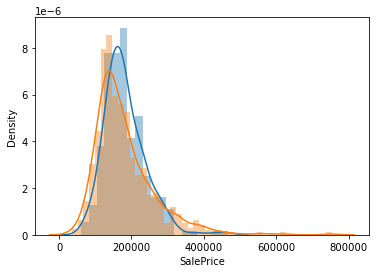

In [64]:
sns.distplot(lot_na['SalePrice'])
sns.distplot(lot_notna['SalePrice'])

In [65]:
data['LotConfig'].value_counts(dropna=False)

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [66]:
# lot_na, lot_notna
print("null values at lot frontage")
print(lot_na['LotConfig'].value_counts()/lot_na.shape[0])
print()
print("not null values at lotfrontage")
print(lot_notna['LotConfig'].value_counts()/lot_notna.shape[0])

null values at lot frontage
Inside     0.517375
Corner     0.239382
CulDSac    0.189189
FR2        0.054054
Name: LotConfig, dtype: float64

not null values at lotfrontage
Inside     0.764363
Corner     0.167361
CulDSac    0.037469
FR2        0.027477
FR3        0.003331
Name: LotConfig, dtype: float64


#### About Lot Area and Lot related columns
A lot area is the area of the property upto the boundary. This is usually easier to measure, and most of the time is given to you by the zoning department of your city. In a suburb, a lot area is just the yard encompassing a house but in the city, a building's lot area can include things like parking lots, garages, and land surroundings the building. 

These lots are usually zoned by local government. The government decides where they will zone things like recidential areas, commercial buildings, and even agriculture or industrial buildings. This allows cities to understand which parts of the town they are able to grow and which parts are getting close to capacity.

Lot frontage is the length of a side of the plot which facing towards the road.

In [67]:
lot_na['MSZoning'].value_counts()

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [68]:
lot_notna['MSZoning'].value_counts()

RL         922
RM         199
FV          57
RH          13
C (all)     10
Name: MSZoning, dtype: int64

In [69]:
data.groupby('MSZoning')['LotFrontage'].median()

MSZoning
C (all)    60.0
FV         65.0
RH         60.0
RL         72.0
RM         51.0
Name: LotFrontage, dtype: float64

In [70]:
lot_notna.groupby('MSZoning')['LotFrontage'].median()

MSZoning
C (all)    60.0
FV         65.0
RH         60.0
RL         72.0
RM         51.0
Name: LotFrontage, dtype: float64

In [71]:
lot_data = data.groupby(['MSZoning', 'LotConfig'])['LotFrontage', 'LotArea'].median()
lot_data['ratio'] = lot_data['LotArea'] / lot_data['LotFrontage']
lot_data

LotFrontage  LotArea       ratio
MSZoning LotConfig                                  
C (all)  Corner            82.5   7835.0   94.969697
         Inside            60.0   8712.0  145.200000
FV       Corner            47.0   4230.0   90.000000
         CulDSac           50.0   5119.0  102.380000
         FR2               24.0   2651.0  110.458333
         FR3               35.0   3735.0  106.714286
         Inside            65.0   7862.0  120.953846
RH       Corner            60.0   8400.0  140.000000
         Inside            60.0   7109.0  118.483333
RL       Corner            85.0  10957.0  128.905882
         CulDSac           50.0  12772.0  255.440000
         FR2               67.5  10500.0  155.555556
         FR3              129.0  16737.0  129.744186
         Inside            70.0   9600.0  137.142857
RM       Corner            60.0   6501.0  108.350000
         FR2               32.0   4500.0  140.625000
         FR3               59.5   7176.5  120.613445
         Inside            50.0   6000.0  120.000000

In [72]:
lot_data = data.groupby(['LotConfig', 'MSZoning'])['LotFrontage', 'LotArea'].median()
lot_data['ratio'] = lot_data['LotArea'] / lot_data['LotFrontage']
lot_data

LotFrontage  LotArea       ratio
LotConfig MSZoning                                  
Corner    C (all)          82.5   7835.0   94.969697
          FV               47.0   4230.0   90.000000
          RH               60.0   8400.0  140.000000
          RL               85.0  10957.0  128.905882
          RM               60.0   6501.0  108.350000
CulDSac   FV               50.0   5119.0  102.380000
          RL               50.0  12772.0  255.440000
FR2       FV               24.0   2651.0  110.458333
          RL               67.5  10500.0  155.555556
          RM               32.0   4500.0  140.625000
FR3       FV               35.0   3735.0  106.714286
          RL              129.0  16737.0  129.744186
          RM               59.5   7176.5  120.613445
Inside    C (all)          60.0   8712.0  145.200000
          FV               65.0   7862.0  120.953846
          RH               60.0   7109.0  118.483333
          RL               70.0   9600.0  137.142857
          RM               50.0   6000.0  120.000000

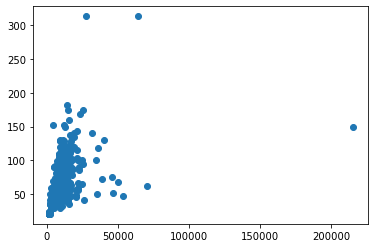

In [73]:
# trying to plot relationship between lot area and lot frontage
plt.scatter(data['LotArea'], data['LotFrontage'])
plt.show()

In [74]:
# Columns on which lotfrontage depends on -- by self intuition
lot_frontage_rel_cols = ['MSSubClass','MSZoning','LotFrontage','Street','LotArea','Street','Alley','LotShape','LandContour',
                         'LotConfig', 'Neighborhood', 'Condition1','Condition2', 'BldgType','HouseStyle', 'GrLivArea', 
                         'GarageArea', 'SalePrice']

In [75]:
train = lot_notna[lot_frontage_rel_cols]
test = lot_na[lot_frontage_rel_cols]
X_tr, y_tr = train.drop('LotFrontage', axis=1), train['LotFrontage']
X_te = test.drop('LotFrontage', axis=1)

In [76]:
ordinal = meta[meta['expect_datatype']=='ord']

In [77]:
from sklearn import model_selection, preprocessing

In [88]:
df = data.copy(deep=True)
for i in X_tr:
    if i in ordinal:
        enc = preprocessing.LabelEncoder()
        X_tr.loc[:, i] = enc.fit_transform(X_tr)
        X_te.loc[:, i] = enc.fit_transform(X_te)
        df.loc[:,i] = enc.fit_transform(df.loc[:,i])

In [89]:
temp = meta[meta['expect_datatype']=='tem'].index.to_list()
df.drop(temp, axis=1, inplace=True)
df.shape

(1460, 75)

In [90]:
df = pd.get_dummies(df)
df.shape, data.shape

((1460, 298), (1460, 80))

In [91]:
cols = df.columns

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
knn_imp = KNNImputer()
knn_sel = knn_imp.fit_transform(df)

In [95]:
knn_sel = pd.DataFrame(knn_sel, columns=cols)
knn_sel['LotFrontage'].isna().sum()

0

In [96]:
it_imp = IterativeImputer()
it_sel = it_imp.fit_transform(df)
it_sel = pd.DataFrame(it_sel, columns=cols)
it_sel['LotFrontage'].isna().sum()

0

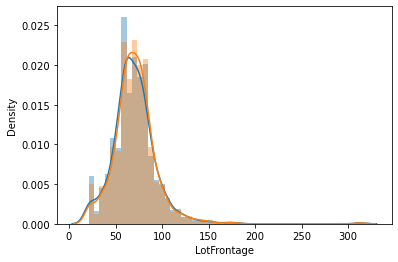

In [97]:
# checking distribution of both the imputation method with origional data
sns.distplot(data['LotFrontage'])
sns.distplot(knn_sel['LotFrontage'])
plt.show()

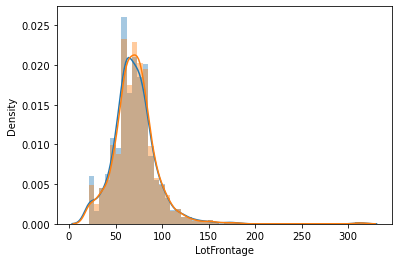

In [98]:
sns.distplot(data['LotFrontage'])
sns.distplot(it_sel['LotFrontage'])
plt.show()

In [111]:
print(f"median orig {data['LotFrontage'].median()} knn imputer \
{knn_sel['LotFrontage'].median()} Iterative {it_sel['LotFrontage'].median()}")

print(f"mean orig {np.round(data['LotFrontage'].mean(),2)} knn imputer \
{np.round(knn_sel['LotFrontage'].mean(),2)} Iterative {np.round(it_sel['LotFrontage'].mean(),2)}")

print(f"std orig {np.round(data['LotFrontage'].std(),2)} knn imputer \
{np.round(knn_sel['LotFrontage'].std(),2)} Iterative {np.round(it_sel['LotFrontage'].std(),2)}")

print(f"mode orig {np.round(data['LotFrontage'].mode().values[0],2)} knn imputer \
{np.round(knn_sel['LotFrontage'].mode().values[0],2)} Iterative {(it_sel['LotFrontage'].mode().values[0])}")

median orig 69.0 knn imputer 70.0 Iterative 70.0
mean orig 70.05 knn imputer 70.74 Iterative 70.73
std orig 24.28 knn imputer 23.33 Iterative 23.55
mode orig 60.0 knn imputer 60.0 Iterative 60.0


from the above observation, we got that every distribution is nearly same, so we adopt Iterative imputer as its more close towards the original distribution

In [112]:
data.loc[:,'LotFrontage'] = it_sel['LotFrontage']

In [113]:
data.isna().sum().sum()

1

In [118]:
data.columns[data.isna().sum() > 0]

Index(['Electrical'], dtype='object')

In [120]:
data.dropna(inplace=True)

In [121]:
data.columns[data.isna().sum() > 0]

Index([], dtype='object')

In [122]:
data.to_csv('../data/processed/cleaned_data.csv', index=False)